## CDC Wonder Data
### This notebook shows the data from CDC Wonder Database for cross-validating the results obtained from the API call data results from US Census Bureau

* Dataset for the male population of Illinois by age groups and race/ethnicity from 2010 - 2020

* Raw data file is downloaded from the Wonder Database from CDC

**Processing steps before loading into this notebook:**
1. Read the downloaded .txt file in Excel
<br>
***Then in Power Query:***
<br>
> 2. Select the first row as the header
3. Remove the columns 'Ethnicity Code', 'Race Code', 'Ten-Year Age Group Code', and 'Yearly July 1st Estimates Code'
4. Change the data type to Interger for the column 'Yearly July 1st Estimates' and 'Population'
5. Remove the most bottom 23 rows
6. Re-order the columns to the current order


* The dataset file is stored under this repository with the file name 'wonder_CDC_dataset.csv'

*Link to the raw dataset:*<br>
https://wonder.cdc.gov/controller/datarequest/D170;jsessionid=535B58DD97F6421AA99A8F6679A7

In [19]:
# Loading the dataset

import pandas as pd

## Read the dataset file downloaded from CDC Wonder Database
CDC_df = pd.read_csv('wonder_CDC_dataset.csv')
CDC_df = CDC_df.iloc[:-3,:]

## Cleaning and Transforming the format of the dataset
CDC_df['Yearly July 1st Estimates'] = CDC_df['Yearly July 1st Estimates'].astype('int32')
CDC_df['Population'] = CDC_df['Population'].astype('int32')
CDC_df['Notes'] = CDC_df['Notes'].fillna("Sub-group Total")
CDC_df['Race'] = CDC_df['Race'].fillna("All Race")
CDC_df['Ethnicity'] = CDC_df['Ethnicity'].fillna("All Ethnicity")

## Function for querying the dataset
def query_func(df: pd.DataFrame, 
               year='all', 
               race: str='all', 
               ethnicity: str='all',
               age_group: str='all'):
    
    ### Setting the display dataframe to show all rows
    pd.set_option('display.max_rows', None)
    
    ### Set up the query conditions text string
    query_string = str()
    
    if year != 'all':
        query_string += f'`Yearly July 1st Estimates` == {year}'
    
    if race != 'all':
        query_string += '& ' + f'`Race` == "{race}"'
    
    if ethnicity != 'all':
        query_string += '& ' + f'`Ethnicity` == "{ethnicity}"'
        
    if age_group != 'all':
        query_string += '& ' + f'`Ten-Year Age Groups` == "{age_group}"'
    

    ### Return the query results
    return df.query(query_string)

    
    
## Display the final dataframe
display(CDC_df)

,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
0,2010,< 1 year,Hispanic or Latino,Black or African American,Sub-group Total,810
1,2010,< 1 year,Hispanic or Latino,White,Sub-group Total,18903
2,2010,< 1 year,Hispanic or Latino,All Race,Total,19713
3,2010,< 1 year,Not Hispanic or Latino,Black or African American,Sub-group Total,13152
4,2010,< 1 year,Not Hispanic or Latino,White,Sub-group Total,42305
5,2010,< 1 year,Not Hispanic or Latino,All Race,Total,55457
6,2010,< 1 year,All Ethnicity,All Race,Total,75170
7,2010,1-4 years,Hispanic or Latino,Black or African American,Sub-group Total,3528
8,2010,1-4 years,Hispanic or Latino,White,Sub-group Total,77754
9,2010,1-4 years,Hispanic or Latino,All Race,Total,81282


## Male Population Statistics for Illinois and Chicago Metro Area from US Census Bureau

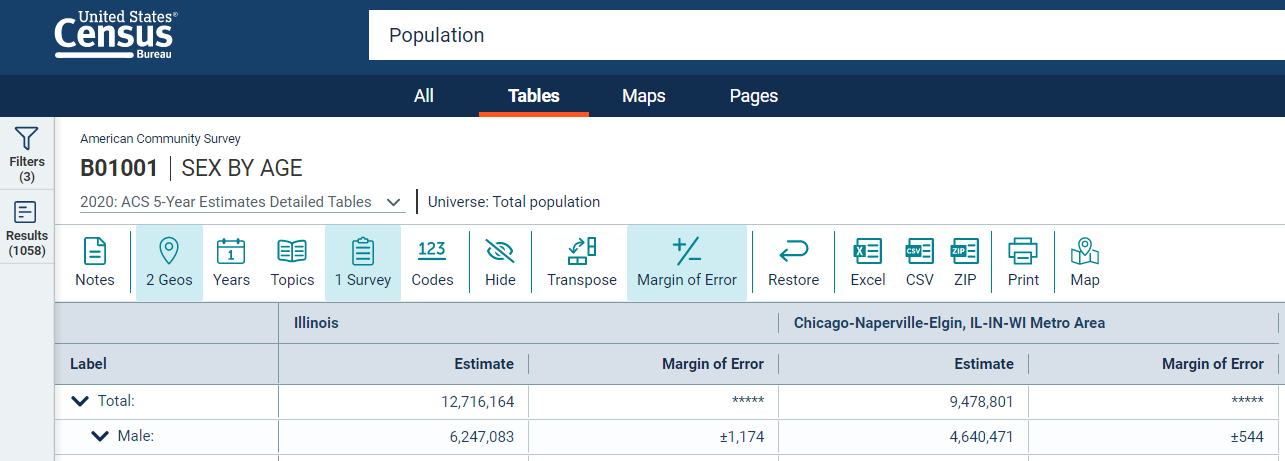


*Source: US Census Bureau*<br>
*https://data.census.gov/cedsci/table?q=Population&g=0400000US17_310XX00US16980&d=ACS%205-Year%20Estimates%20Detailed%20Tables&tid=ACSDT5Y2020.B01001*

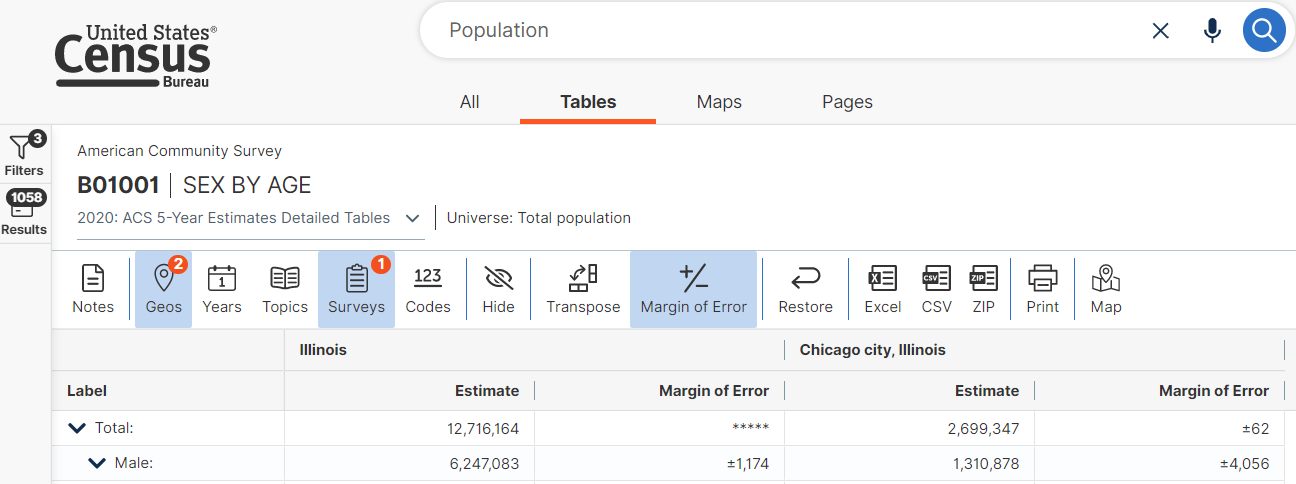

In [1]:
## Calculate the Ratio of Male Population in Chicago Metro Area over Illinois in 2020

pct_IL_Chi = round((1310878/6247083)*100, 1)

print('Ratio of Male Population in Chicago Metro Area over Illinois = 4,640,471/6,247,083 = ' + str(pct_IL_Chi) + '%')

Ratio of Male Population in Chicago Metro Area over Illinois = 4,640,471/6,247,083 = 21.0%


From the US Census Bureau data, the male population is 6,247,083 in the state of Illinois and 1,310,878 in the Chicago City in 2020.<br><br>As such, we can infer that the population statistic in the CDC Wonder dataset multiplied by c. 21.0% (this ratio should roughly hold for other years as well) should be roughly in line with the population statistic in the ACS API data, and can serve as a reference point to verify the accuracy of the data.

## Example Demonstrations

Below shows an example of using the query function *query_func* defined above to query the dataset from CDC Wonder using criteria such as year, race, and age group:

### Example 1: Query by Year and Race

In [18]:
query_func(CDC_df, year=2018, race='White', )

,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
625,2018,< 1 year,Hispanic or Latino,White,Sub-group Total,15198
628,2018,< 1 year,Not Hispanic or Latino,White,Sub-group Total,38025
632,2018,1-4 years,Hispanic or Latino,White,Sub-group Total,65357
635,2018,1-4 years,Not Hispanic or Latino,White,Sub-group Total,160085
639,2018,5-14 years,Hispanic or Latino,White,Sub-group Total,184418
642,2018,5-14 years,Not Hispanic or Latino,White,Sub-group Total,415246
646,2018,15-24 years,Hispanic or Latino,White,Sub-group Total,173685
649,2018,15-24 years,Not Hispanic or Latino,White,Sub-group Total,455539
653,2018,25-34 years,Hispanic or Latino,White,Sub-group Total,160182
656,2018,25-34 years,Not Hispanic or Latino,White,Sub-group Total,507324


,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
625,2018,< 1 year,Hispanic or Latino,White,Sub-group Total,15198
628,2018,< 1 year,Not Hispanic or Latino,White,Sub-group Total,38025
632,2018,1-4 years,Hispanic or Latino,White,Sub-group Total,65357
635,2018,1-4 years,Not Hispanic or Latino,White,Sub-group Total,160085
639,2018,5-14 years,Hispanic or Latino,White,Sub-group Total,184418
642,2018,5-14 years,Not Hispanic or Latino,White,Sub-group Total,415246
646,2018,15-24 years,Hispanic or Latino,White,Sub-group Total,173685
649,2018,15-24 years,Not Hispanic or Latino,White,Sub-group Total,455539
653,2018,25-34 years,Hispanic or Latino,White,Sub-group Total,160182
656,2018,25-34 years,Not Hispanic or Latino,White,Sub-group Total,507324


In [24]:
test = query_func(df = CDC_df, year = 2018, race = 'White', ethnicity = 'Not Hispanic or Latino')

test.Population.sum()*0.21

query_func(df = CDC_df, year = 2018).Population.sum()

22874220

In [26]:
0.21*(517513/(0.7*0.31))

x*0.71 = 517513
x=(517513/0.71)*0.31*0.21

500819.0322580645

In [28]:
(517513/0.61)*0.31*0.21


55229.666065573765

In [4]:
## Query by: year = 2018, race = Black or African American (Non Hispanic)
query_func(df = CDC_df, year = 2018, race = 'Black or African American', ethnicity = 'Not Hispanic or Latino')

,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
627,2018,< 1 year,Not Hispanic or Latino,Black or African American,Sub-group Total,12576
634,2018,1-4 years,Not Hispanic or Latino,Black or African American,Sub-group Total,49379
641,2018,5-14 years,Not Hispanic or Latino,Black or African American,Sub-group Total,121900
648,2018,15-24 years,Not Hispanic or Latino,Black or African American,Sub-group Total,134469
655,2018,25-34 years,Not Hispanic or Latino,Black or African American,Sub-group Total,132773
662,2018,35-44 years,Not Hispanic or Latino,Black or African American,Sub-group Total,101730
669,2018,45-54 years,Not Hispanic or Latino,Black or African American,Sub-group Total,102207
676,2018,55-64 years,Not Hispanic or Latino,Black or African American,Sub-group Total,97773
683,2018,65-74 years,Not Hispanic or Latino,Black or African American,Sub-group Total,56178
690,2018,75-84 years,Not Hispanic or Latino,Black or African American,Sub-group Total,25217


### Example 2: Query by Year, Ethnicity, and Age Group

In [5]:
## Query by: year = 2016, ethnicity = Hispanic/Latino, Age Group = 45-54 years
query_func(df = CDC_df, year = 2016, ethnicity = 'Hispanic or Latino', age_group = '45-54 years')

,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
510,2016,45-54 years,Hispanic or Latino,Black or African American,Sub-group Total,2987
511,2016,45-54 years,Hispanic or Latino,White,Sub-group Total,118573
512,2016,45-54 years,Hispanic or Latino,All Race,Total,121560


### Comparison of Data

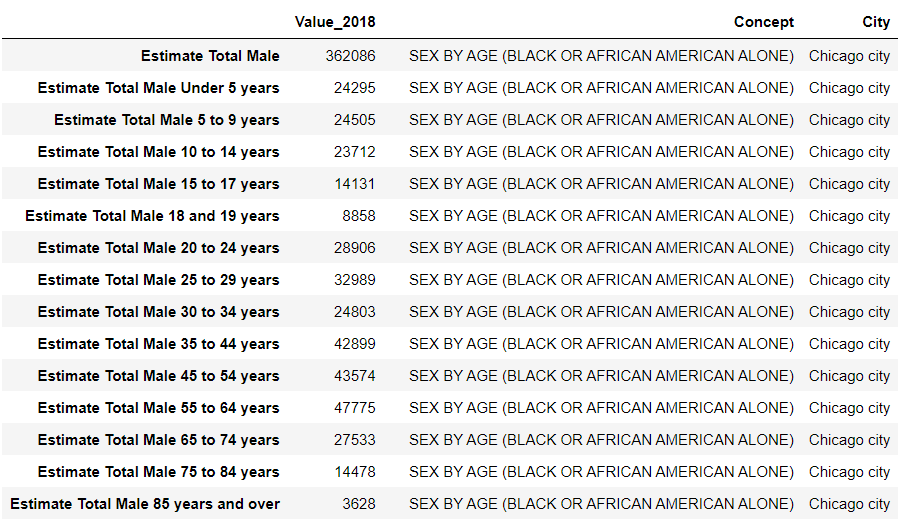


In [13]:
query_result = query_func(df = CDC_df, year = 2018, race = 'Black or African American', ethnicity = 'Not Hispanic or Latino')

query_result.iloc[:,5]*0.21

,Yearly July 1st Estimates,Ten-Year Age Groups,Ethnicity,Race,Notes,Population
627,2018,< 1 year,Not Hispanic or Latino,Black or African American,Sub-group Total,12576
634,2018,1-4 years,Not Hispanic or Latino,Black or African American,Sub-group Total,49379
641,2018,5-14 years,Not Hispanic or Latino,Black or African American,Sub-group Total,121900
648,2018,15-24 years,Not Hispanic or Latino,Black or African American,Sub-group Total,134469
655,2018,25-34 years,Not Hispanic or Latino,Black or African American,Sub-group Total,132773
662,2018,35-44 years,Not Hispanic or Latino,Black or African American,Sub-group Total,101730
669,2018,45-54 years,Not Hispanic or Latino,Black or African American,Sub-group Total,102207
676,2018,55-64 years,Not Hispanic or Latino,Black or African American,Sub-group Total,97773
683,2018,65-74 years,Not Hispanic or Latino,Black or African American,Sub-group Total,56178
690,2018,75-84 years,Not Hispanic or Latino,Black or African American,Sub-group Total,25217


627     2640.96
634    10369.59
641    25599.00
648    28238.49
655    27882.33
662    21363.30
669    21463.47
676    20532.33
683    11797.38
690     5295.57
697     1650.18
Name: Population, dtype: float64